In [1]:
%matplotlib inline
import carmcmc as cm
import numpy as np
import matplotlib.pyplot as plt


sigmay = 2.3 
p = 5 
mu = 17.0  
qpo_width = np.array([1.0/100.0, 1.0/300.0, 1.0/200.0]) 
qpo_cent = np.array([1.0/5.0, 1.0/25.0]) 
ar_roots = cm.get_ar_roots(qpo_width, qpo_cent) 
ar_coefs = np.poly(ar_roots)
ma_coefs = np.array([1.0, 4.5, 1.25, 0.0, 0.0])
sigsqr = sigmay ** 2 / cm.carma_variance(1.0, ar_roots, ma_coefs=ma_coefs)

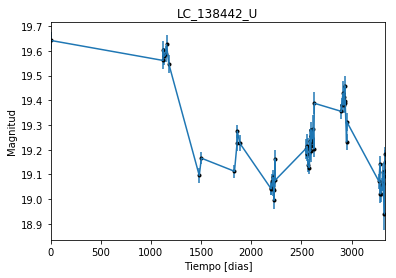

In [26]:
data = np.genfromtxt('LC_138442_U.dat')
juldate = data[:,0]  
t = juldate - juldate.min()  
y = data[:,1]  
yerr = data[:,2]  

plt.errorbar(t, y, yerr=yerr)
plt.plot(t, y, 'k.')
plt.xlim(t.min(), t.max())
plt.xlabel('Tiempo [dias]')
plt.ylabel('Magnitud')
plt.title('LC_138442_U')
plt.savefig("LC_138442_U.pdf")

In [3]:
model = cm.CarmaModel(t, y, yerr, p=4, q=1)

In [4]:
%%capture capt
sample = model.run_mcmc(20000)

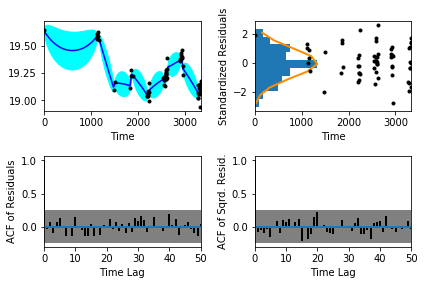

In [5]:
sample.assess_fit()

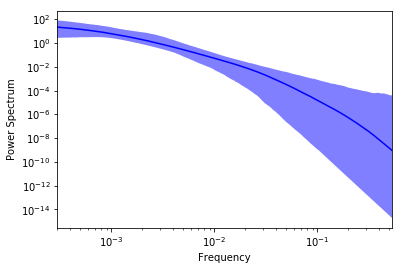

In [6]:
psd_low, psd_hi, psd_mid, frequencies = sample.plot_power_spectrum(percentile=95.0, nsamples=5000)

In [7]:
dt = t[1:] - t[:-1]
noise_level = 2.0 * np.mean(dt) * np.mean(yerr ** 2)

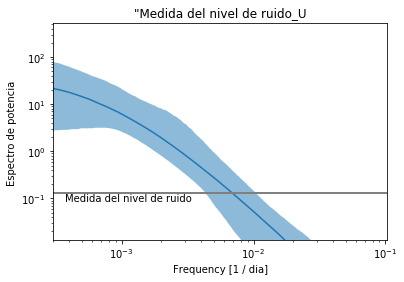

In [8]:
plt.loglog(frequencies, psd_mid)
plt.fill_between(frequencies, psd_hi, y2=psd_low, alpha=0.5)
plt.loglog(frequencies, np.ones(frequencies.size) * noise_level, color='grey', lw=2)
plt.ylim(noise_level / 10.0, plt.ylim()[1])
plt.xlim(frequencies.min(), frequencies[psd_hi > noise_level].max() * 10.0)
plt.ylabel('Espectro de potencia ')
plt.xlabel('Frequency [1 / dia]')
plt.annotate("Medida del nivel de ruido", (1.25 * plt.xlim()[0], noise_level / 1.5))
plt.title('LC_138442_U')
plt.title('"Medida del nivel de ruido_U')
plt.savefig("Medida del nivel de ruido_U.pdf")

Text(0.5,1,'Prediccion , valor esperado LC_138442_U')

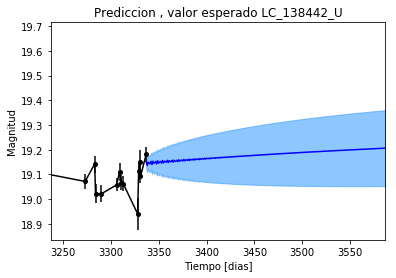

In [9]:
tpredict = t.max() + np.linspace(0.0, 250.0, 250)
ypredict, yp_var = sample.predict(tpredict)
plt.errorbar(t, y, yerr=yerr, color='black')
plt.plot(t, y, 'ko', ms=4)
plt.fill_between(tpredict, ypredict+np.sqrt(yp_var), y2=ypredict-np.sqrt(yp_var), color='DodgerBlue', alpha=0.5)
plt.plot(tpredict, ypredict, 'b-')
plt.xlim(tpredict.min() - 100, tpredict.max())
plt.xlabel('Tiempo [dias]')
plt.ylabel('Magnitud')
plt.title('Prediccion , valor esperado LC_138442_U')

Text(0.5,1,'Prediccion, Caminos simulados  LC_138442_U')

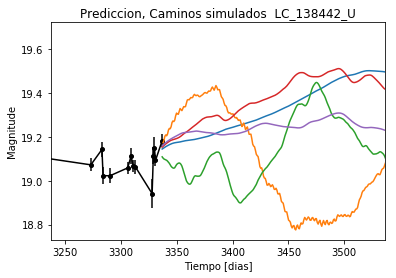

In [10]:
tpredict = t.max() + np.linspace(0.0, 200.0, 250)
npaths = 5
plt.errorbar(t, y, yerr=yerr, color='black')
plt.plot(t, y, 'ko', ms=4)
for i in range(npaths):
    ysim = sample.simulate(tpredict, bestfit='random')  
    plt.plot(tpredict, ysim)
plt.xlabel('Tiempo [dias]')
plt.ylabel('Magnitude')
plt.xlim(tpredict.min()-100, tpredict.max())
plt.title('Prediccion, Caminos simulados  LC_138442_U')

/usr/local/lib/python2.7/dist-packages/matplotlib/axes/_axes.py:6571: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


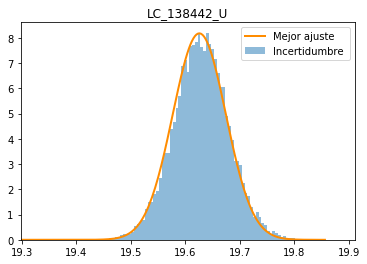

In [11]:
tpredict = 10.0
nsim = 10000
ysim = np.zeros(nsim)
for i in range(nsim):
    ysim[i] = sample.simulate(tpredict, bestfit='random')
yhat, yhvar = sample.predict(tpredict)
plt.hist(ysim, bins=100, alpha=0.5, histtype='stepfilled', normed=True, label='Incertidumbre ')
ymin, ymax = plt.xlim()
ygrid = np.linspace(ymin, ymax, 200)
predictive_pdf = 1.0 / np.sqrt(2.0 * np.pi * yhvar) * np.exp(-0.5 * (ygrid - yhat) ** 2 / yhvar)
plt.plot(ygrid, predictive_pdf, color='DarkOrange', lw=2, label='Mejor ajuste ')
plt.xlim(ymin, ymax + 0.1 * (ymax - ymin))
plt.legend(loc='upper right')
plt.title('LC_138442_U')
plt.savefig("Mejor_ajuste_LC_138442_U.pdf")

Text(0.5,1,'Interpolacion, camino simulado LC_138442_U')

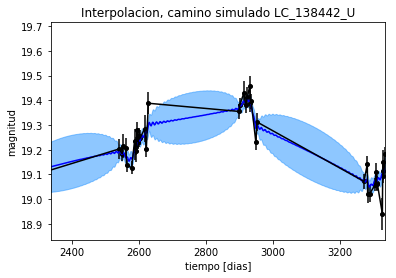

In [12]:
tinterp = t.max() - 1000 + np.linspace(0.0, 1000.0, 500)
ypredict, yp_var = sample.predict(tinterp)
plt.errorbar(t, y, yerr=yerr, color='black')
plt.plot(t, y, 'ko', ms=4)
plt.fill_between(tinterp, ypredict+np.sqrt(yp_var), y2=ypredict-np.sqrt(yp_var), color='DodgerBlue', alpha=0.5)
plt.plot(tinterp, ypredict, 'b-')
plt.xlabel('tiempo [dias]')
plt.ylabel('magnitud')
plt.xlim(tinterp.min(), tinterp.max())
plt.title('Interpolacion, camino simulado LC_138442_U')

Text(0.5,1,'Interpolacion, camino simulado LC_138442_U')

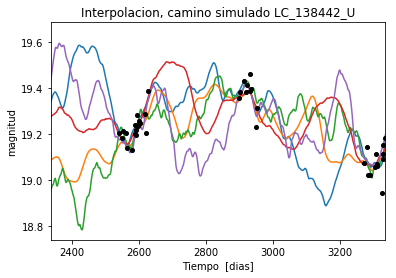

In [13]:
npaths = 5
for i in range(npaths):
    ysim = sample.simulate(tinterp, bestfit='random')
    plt.plot(tinterp, ysim)
plt.plot(t, y, 'ko', ms=4)
plt.xlabel('Tiempo  [dias]')
plt.ylabel('magnitud')
plt.xlim(tinterp.min(), tinterp.max())
plt.title('Interpolacion, camino simulado LC_138442_U')

In [14]:
sample.parameters

['quad_coefs',
 'logpost',
 'ar_coefs',
 'mu',
 'psd_centroid',
 'loglik',
 'psd_width',
 'var',
 'measerr_scale',
 'sigma',
 'ma_coefs',
 'ar_roots']

In [15]:
sample.posterior_summaries('psd_width')

Calculating effective number of samples
Posterior summary for parameter psd_width  element 0
----------------------------------------------
Effective number of independent samples: 1036.9276667
Median: 0.0317399239925
Standard deviation: 0.230969192498
68% credibility interval: [ 0.00274647  0.28149002]
95% credibility interval: [  5.03183404e-04   8.91849223e-01]
99% credibility interval: [  3.27441035e-04   1.02928022e+00]
Posterior summary for parameter psd_width  element 1
----------------------------------------------
Effective number of independent samples: 942.163730971
Median: 0.00984798777509
Standard deviation: 0.114501393618
68% credibility interval: [ 0.00084078  0.07738438]
95% credibility interval: [  3.46238931e-04   3.79871381e-01]
99% credibility interval: [  3.07573348e-04   8.06199500e-01]
Posterior summary for parameter psd_width  element 2
----------------------------------------------
Effective number of independent samples: 479.293932283
Median: 0.0420295384275
S

In [16]:
sample.posterior_summaries('logpost')

Calculating effective number of samples
Posterior summary for parameter logpost  element 0
----------------------------------------------
Effective number of independent samples: 998.230359755
Median: 114.110141926
Standard deviation: 1.73836393785
68% credibility interval: [ 112.09951913  115.34808691]
95% credibility interval: [ 109.48399666  116.05810276]
99% credibility interval: [ 107.4090076   116.32831551]


In [17]:
sample.posterior_summaries('ar_coefs')

Calculating effective number of samples
Posterior summary for parameter ar_coefs  element 0
----------------------------------------------
Effective number of independent samples: nan
Median: 1.0
Standard deviation: 0.0
68% credibility interval: [ 1.  1.]
95% credibility interval: [ 1.  1.]
99% credibility interval: [ 1.  1.]
Posterior summary for parameter ar_coefs  element 1
----------------------------------------------
Effective number of independent samples: 552.420150752
Median: 1.07652909635
Standard deviation: 2.54964329353
68% credibility interval: [ 0.14616611  4.80169057]
95% credibility interval: [ 0.02521178  9.00319392]
99% credibility interval: [  0.01253502  11.95681501]
Posterior summary for parameter ar_coefs  element 2
----------------------------------------------
Effective number of independent samples: 354.026804884
Median: 2.17564225499
Standard deviation: 11.7704840551
68% credibility interval: [  0.12849129  16.86256441]
95% credibility interval: [  9.60893969e

In [18]:
sample.posterior_summaries('ma_coefs')

Calculating effective number of samples
Posterior summary for parameter ma_coefs  element 0
----------------------------------------------
Effective number of independent samples: nan
Median: 1.0
Standard deviation: 0.0
68% credibility interval: [ 1.  1.]
95% credibility interval: [ 1.  1.]
99% credibility interval: [ 1.  1.]
Posterior summary for parameter ma_coefs  element 1
----------------------------------------------
Effective number of independent samples: 1661.39519554
Median: 1.40470717218e-33
Standard deviation: 4.98463926301e+123
68% credibility interval: [  8.02402660e-92   7.45466564e-10]
95% credibility interval: [  1.55475744e-118   2.42773322e+003]
99% credibility interval: [  2.43218785e-125   2.01784205e+120]


In [19]:
sample.posterior_summaries('mu')

Calculating effective number of samples
Posterior summary for parameter mu  element 0
----------------------------------------------
Effective number of independent samples: 1073.0870608
Median: 19.3099642977
Standard deviation: 0.110079406834
68% credibility interval: [ 19.2163891   19.41666485]
95% credibility interval: [ 19.10857812  19.5392725 ]
99% credibility interval: [ 19.00918281  19.6552064 ]


In [20]:
sample.posterior_summaries('psd_centroid')

Calculating effective number of samples
Posterior summary for parameter psd_centroid  element 0
----------------------------------------------
Effective number of independent samples: 290.854978144
Median: 0.064732073298
Standard deviation: 0.292351815342
68% credibility interval: [ 0.          0.57151462]
95% credibility interval: [ 0.          0.96556241]
99% credibility interval: [ 0.          1.04284104]
Posterior summary for parameter psd_centroid  element 1
----------------------------------------------
Effective number of independent samples: 290.854978144
Median: 0.064732073298
Standard deviation: 0.292351815342
68% credibility interval: [ 0.          0.57151462]
95% credibility interval: [ 0.          0.96556241]
99% credibility interval: [ 0.          1.04284104]
Posterior summary for parameter psd_centroid  element 2
----------------------------------------------
Effective number of independent samples: 1042.39007241
Median: 0.0
Standard deviation: 0.000528037566636
68% cred

In [21]:
sample.posterior_summaries('loglik')

Calculating effective number of samples
Posterior summary for parameter loglik  element 0
----------------------------------------------
Effective number of independent samples: 998.230359755
Median: 114.110141926
Standard deviation: 1.73836393785
68% credibility interval: [ 112.09951913  115.34808691]
95% credibility interval: [ 109.48399666  116.05810276]
99% credibility interval: [ 107.4090076   116.32831551]


In [22]:
sample.posterior_summaries('var')

Calculating effective number of samples
Posterior summary for parameter var  element 0
----------------------------------------------
Effective number of independent samples: 1813.26151628
Median: 0.0482230158145
Standard deviation: 0.0395687504013
68% credibility interval: [ 0.03139336  0.08047615]
95% credibility interval: [ 0.02108441  0.14795213]
99% credibility interval: [ 0.01678823  0.24644439]


In [23]:
sample.posterior_summaries('measerr_scale')

Calculating effective number of samples
Posterior summary for parameter measerr_scale  element 0
----------------------------------------------
Effective number of independent samples: 897.494311959
Median: 1.17050632212
Standard deviation: 0.205177006929
68% credibility interval: [ 0.9860488   1.38503073]
95% credibility interval: [ 0.83087879  1.64359196]
99% credibility interval: [ 0.75194077  1.82106524]


In [24]:
sample.posterior_summaries('sigma')

Calculating effective number of samples
Posterior summary for parameter sigma  element 0
----------------------------------------------
Effective number of independent samples: 391.849177492
Median: 0.00384668506534
Standard deviation: 0.25323547423
68% credibility interval: [ 0.00010739  0.07826787]
95% credibility interval: [  1.59523998e-08   7.74592643e-01]
99% credibility interval: [  1.14607020e-123   1.70725187e+000]


In [25]:
sample.posterior_summaries('ar_roots')

Calculating effective number of samples
Posterior summary for parameter ar_roots  element 0
----------------------------------------------
Effective number of independent samples: 1036.9276667
Median: (-0.19942782408+0j)
Standard deviation: 2.3409933591
68% credibility interval: [-1.76865395-2.02431523j -0.01725655-0.13157509j]
95% credibility interval: [ -5.60365394e+00+0.j          -3.16159457e-03-3.18794364j]
99% credibility interval: [ -6.46715835e+00-4.07524086j  -2.05737270e-03-5.74924517j]
Posterior summary for parameter ar_roots  element 1
----------------------------------------------
Effective number of independent samples: 942.163730971
Median: (-0.0618767320937+0.172310768945j)
Standard deviation: 1.97276163045
68% credibility interval: [-0.48622040+0.j -0.00528277+0.j]
95% credibility interval: [ -2.38680228e+00+0.99733467j  -2.17548336e-03+0.j        ]
99% credibility interval: [ -5.06550085e+00+2.88192062j  -1.93254034e-03+1.96914693j]
Posterior summary for parameter ar_